# This plots the \Delta T over \Delta P
## Run from beginning until the end gives all the pictures

### Used for: 
- Full Figure
    - hom_P-2Pr (2100)
#### Idea: 
Use this also for full forcing (incl albedo)
    


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib import gridspec
fs=22 #fontsize for labels, legend, ...
font={'family' : 'serif', 'size' : fs} #define font for legend
plt.rc('font', **font)
import cmocean

/home/peter/anaconda2/lib/python2.7/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
climber_path="/home/peter/PIK/climber/"
#'/home/peter/PIK/climber/
#'/home/peter/Masterthesis/climber/

In [3]:
data_grid=xr.open_dataset(climber_path+
    'data_preparation/snapshots_potsdam2.055623.01.01.dta.nc', 
    #
    decode_times=False)


In [4]:
def get_time(y):
    return (y+54783-1-1810)*360-0.5
def get_year(t):
    return (t+0.5)/360 +1810+1-54783
    #return (t+54783-1-1810)*360-0.5
get_time(2010)
get_year(19793519.5)


2010.0

In [5]:
mainfolder=climber_path+"cluster_results/data_Mai8files/"
reffolder=mainfolder
runname="hom_P-2Pr"
refname="hom_REF"#"RESTandREF_fourth"
folder_p=mainfolder+"c3beta_anthrHeat_"+runname+'/'
folder_ref=reffolder+"c3beta_anthrHeat_"+refname+'/'

In [6]:
data_ref= xr.open_dataset(folder_ref+"history_p2_short.nc", decode_times=False)
data_p= xr.open_dataset(folder_p+"history_p2_short.nc", decode_times=False)


In [7]:
def area_mean_lon(x, lats=data_ref.yt_j, lon=data_ref.xt_i):
    '''x should have dimensions: lat,lon'''
    weights=np.cos(lats*np.pi/180)
    irrelevant,real_weights=np.meshgrid(lon, weights)
    z=real_weights*x
    return np.sum(z)/np.sum(real_weights)

In [8]:
growth="2%"
title_name="Local correlation of $\Delta T(\phi,\theta) and P_{hum}(\phi, \theta) for "+growth+" of $P_{hum}$ after 2010"+'\n'+"using "+runname+" and "+refname
plot_name="corr_dT-P_"+runname
#for i in range(2010, 2130):
years=np.array([2010, 2100])

P_folder="txt_file_each_yearJul13_11-20"
addendum=""
P=[]
for y in years:
    if y>2010:
        P.append(data_grid.frlnd[0] * 1.02**(y-2010)*np.loadtxt(
            "../data_preparation/PMIP/P_hum/"+P_folder+"/P_hum_"+addendum+"year2010.dat"))
    else:
        P.append(data_grid.frlnd[0] * np.loadtxt(
            "../data_preparation/PMIP/P_hum/"+P_folder+"/P_hum_"+addendum+"year"+str(y)+".dat"))
      

In [9]:
year=2010

In [10]:
diff=data_p.ts_ann - data_ref.ts_ann
#print(get_year(diff.Time))
diff=np.array(diff.sel(Time=get_time(year)))

In [11]:
flatT=data_p.ts_ann.sel(Time=get_time(2010)).values.flatten()+273.15
T=data_p.ts_ann.sel(Time=get_time(2010)).values+273.15
# HOMOGENEOUS UPDATE
#P=P_data * data_grid.frlnd[0]
current_P=P[np.where(years==year)[0][0]]
print(area_mean_lon(current_P))
flatP=current_P.values.flatten()

flatdiff=diff.flatten()


<xarray.DataArray 'frlnd' ()>
array(0.03375520949389665)
Coordinates:
    Time     float64 2.002e+07


## Plot T over P

In [12]:
#plt.plot(flatP[np.where(flatP!=0)],flatT[np.where(flatP!=0)], 'x')

## Plot the simple EBM formula (main text)

In [13]:
from scipy.optimize import curve_fit
def linear(x,a,b):
    return a*x+b

In [14]:
dt_EBM=(T**4 + current_P *1./(5.67e-8) *1./0.61)**0.25-T
flatdt_EBM=(flatT**4 + flatP *1./(5.67e-8) *1./0.61)**0.25-flatT
#real_dt=(flatT**4 + flatP *1./(5.67e-8) *1./0.61)**0.25-flatT
#rel_dt_EBM=(1+n_P_arr*1./(5.67e-8) *1./0.61*1./flatT**4)**0.25-1
#plt.plot(flatP, dt_EBM, 'x')


#fig=plt.figure(figsize=(14,4))
#ax=fig.add_subplot(111)
#ax.set_title("Expected from EBM")
#ax.plot(flatP, flatdt_EBM, 'x', label="expecetd curve")
#param_exp, pcov=curve_fit(linear, flatP, flatdt_EBM)
#ax.plot(flatP, linear(flatP, *param_exp), '--', label="Fit with "+'%.3f' % param_exp[0] + "$\cdot P_{hum}$") 
#ax.legend()
#print(param_exp)
#ax2=fig.add_subplot(132)
#ax2.plot(n_P_arr, rel_dt_EBM, 'x')
#ax3=fig.add_subplot(133)
#ax3.plot(P_data.flatten(), real_dt, 'x')


#print("Mean dT in expeceted: ", area_mean_lon(dt_EBM))

## Filter all cells with P=0

In [15]:
Nuller_dT=[]
Pler_dT=[]
Pler_P=[]
for ii in range(0,len(flatP)):
    if flatP[ii]==0:
        Nuller_dT.append(flatdiff[ii])
    else:
        Pler_dT.append(flatdiff[ii])
        Pler_P.append(flatP[ii])
Pler_P=np.array(Pler_P)
Pler_dT=np.array(Pler_dT)

# PLOT

[  3.09706606e-01  -2.06741043e-04]
[ 0.11985827  0.0101433 ]
dT_over_P2010.eps


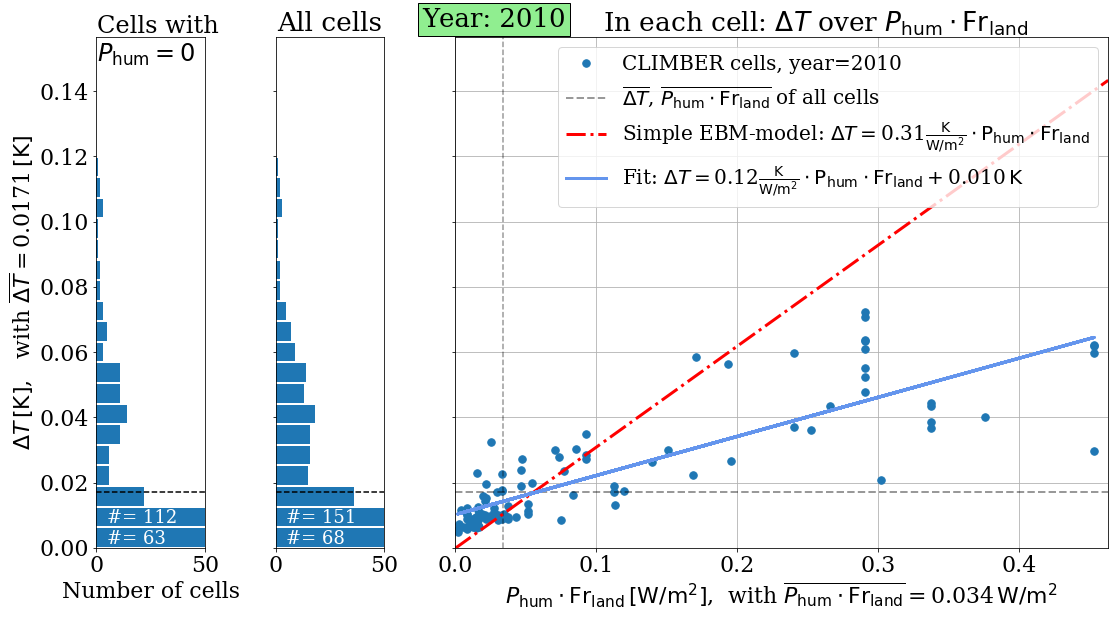

In [17]:
hist2_EBM = plt.hist(flatdt_EBM, bins=24, rwidth=0.9, orientation="horizontal", alpha=0.4)
plt.close()

fig=plt.figure(figsize=(16,9))
gs=gridspec.GridSpec(1,3,width_ratios=[1,1,6])
ax1=fig.add_subplot(gs[0])
ax15=fig.add_subplot(gs[1])
ax2=fig.add_subplot(gs[2])


values=hist2_EBM[0]
bins=hist2_EBM[1]
ymax=max([max(bins), max(flatdt_EBM+0.005)])
ax15.set_ylim(0,ymax)
hist2 = ax15.hist(flatdiff, bins=bins, rwidth=0.9, orientation="horizontal")
values=hist2[0]
bins=hist2[1]
#hist2_EBM = ax15.hist(flatdt_EBM, bins=bins, rwidth=0.9, orientation="horizontal", alpha=0.4)
for n,i in enumerate(values):
    if i>50:
        ax15.text(5,bins[n]+(bins[n+1]-bins[n])*0.2,"#= "+str(int(values[n])),color='white', fontsize=18)
ax15.set_xlim(0,50)
ax15.set_yticklabels([])
ax15.set_title("All cells")
ax15.plot(ax15.get_xlim(),[area_mean_lon(diff), area_mean_lon(diff)], '--', color='black', alpha=1)


ax1.set_ylim(0,ymax)
hist = ax1.hist(Nuller_dT, bins=bins, rwidth=0.9, orientation="horizontal")
values1=hist[0]
bins1=hist[1]
for n,i in enumerate(values1):
    if i>50:
        ax1.text(5,bins[n]+(bins[n+1]-bins[n])*0.2,"#= "+str(int(values1[n])),color='white', fontsize=18)
ax1.set_xlim(0,50)
ax1.text(0.01, 0.95, r"Cells with"+"\n"+r"$P_{\rm hum}=0$", transform=ax1.transAxes, fontsize=24)
ax1.set_ylabel(r"$\Delta T\, [{\rm K}]$,   with $\overline{\Delta T} = $"+'%.4f' % area_mean_lon(diff)+r"$\, [{\rm K}]$")
ax1.set_xlabel("Number of cells")
ax1.plot(ax1.get_xlim(), [area_mean_lon(diff), area_mean_lon(diff)], '--', color='black', alpha=1)



ax2.set_ylim(0,ymax)
ax2.set_xlim(xmin=0, xmax=max(Pler_P)+0.01)

ax2.plot(Pler_P, Pler_dT, '.', markersize=15, label="CLIMBER cells, year="+str(year))
#ax2.plot([0,max(flatdt_EBM)], [0,max(flatdt_EBM)], '-', color='black', alpha=0.5, lw=3)
#ax2.plot(flatP, flatdt_EBM, 'x',  markersize=15, label="EBM curve")
ax2.plot(ax2.get_xlim(), [area_mean_lon(diff), area_mean_lon(diff)], '--', color='black', alpha=0.4,
         lw=2, label=r"$\overline{\Delta T}$, $\overline{P_{\rm hum}\cdot {\rm Fr}_{\rm land}}$ of all cells")
ax2.plot( [area_mean_lon(current_P), area_mean_lon(current_P)], ax2.get_ylim(), '--', color='black', alpha=0.4)

param_exp, pcov=curve_fit(linear, flatP, flatdt_EBM)
print(param_exp)
ax2.plot(ax2.get_xlim(), linear(np.array(ax2.get_xlim()), *param_exp), '-.',lw=3,
         label="Simple EBM-model:"+" $\Delta T=$"+'%.2f' % param_exp[0] + 
         r"$\frac{{\rm K}}{\rm W/m^2} \cdot P_{\rm hum}\cdot {\rm Fr}_{\rm land}$", color='red') 

param_cl, pcov=curve_fit(linear, Pler_P, Pler_dT)
print(param_cl)
ax2.plot(Pler_P, linear(Pler_P, *param_cl), '-', lw=3,
         label="Fit: $\Delta T=$"+'%.2f' % param_cl[0] +\
         r"$\frac{\rm K}{\rm W/m^2} \cdot P_{\rm hum}\cdot {\rm Fr}_{\rm land}+$"+'%.3f' % param_cl[1] +r"$\, {\rm K}$"
         , color='cornflowerblue') 

ax2.set_xlabel(r"$P_{\rm hum}\cdot {\rm Fr}_{\rm land}\, [{\rm W/m^2}]$,  with $\overline{P_{\rm hum}\cdot {\rm Fr}_{\rm land}} = $"+
               '%.3f' % area_mean_lon(current_P)+r"$\, {\rm W/m^2}$")
ax2.set_title(r"        In each cell: $\Delta T$ over $P_{\rm hum}\cdot {\rm Fr}_{\rm land}$")
ax2.text(-0.05, 1.02, r"Year: "+str(year), fontsize=26, transform=ax2.transAxes, color='black', 
         bbox=dict(facecolor='lightgreen', alpha=1))
ax2.grid()
ax2.set_ylim(0,max(flatdt_EBM)+0.005)
ax2.set_yticklabels([])
ax2.legend(fontsize=20)


fig.tight_layout()
print("dT_over_P"+str(year)+".eps")
plt.savefig("dT_over_P"+str(year)+".eps", format='eps', bbox_inches='tight')

In [18]:
print(0.25/288**3/5.67*10**8 *1./0.61, " is the analytical slope of the curve")

(0.3025865721589615, ' is the analytical slope of the curve')


In [19]:
param_cl[1]/area_mean_lon(diff)

0.5938791858190785

In [20]:
print(" something like the lower boundary", np.mean(Nuller_dT))

(' something like the lower boundary', 0.022043904019750048)
